In [1]:
# imports, setup
from scipy import integrate
import numpy as N
import pylab as p
import matplotlib
%matplotlib inline

In [2]:
# define func to be integrated; \int\int dr du
def f(r,u,*args):
    tau = args[0]
    return N.exp(-tau*N.sqrt((1.-r**2)/(1.-u**2)))

In [3]:
# log-equidistant sequence of taus
taus = N.logspace(-2,3,20)

In [4]:
# 3 lists of integrals, with better and better epsabs
integrals_def = [integrate.nquad(f,[[0.,1.],[0.,1.]],args=(_,))[0] for _ in taus]
integrals_e10 = [integrate.nquad(f,[[0.,1.],[0.,1.]],args=(_,),opts={'epsabs':1e-10,'limit':100})[0] for _ in taus]
integrals_e30 = [integrate.nquad(f,[[0.,1.],[0.,1.]],args=(_,),opts={'epsabs':1e-30,'limit':100})[0] for _ in taus]

/home/robert/miniconda2/lib/python2.7/site-packages/scipy/integrate/quadpack.py:356: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)
/home/robert/miniconda2/lib/python2.7/site-packages/scipy/integrate/quadpack.py:356: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  warnings.warn(msg, IntegrationWarning)


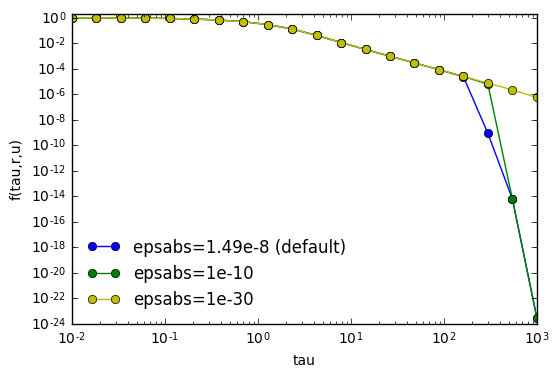

In [5]:
# plot integrals vs taus
p.loglog(taus,integrals_def,'bo-',label='epsabs=1.49e-8 (default)')
p.loglog(taus,integrals_e10,'go-',label='epsabs=1e-10')
p.loglog(taus,integrals_e30,'yo-',label='epsabs=1e-30')
p.ylim(1e-24,2e0)
p.xlabel('tau')
p.ylabel('f(tau,r,u)')
p.legend(loc='lower left',frameon=0)